<a href="https://colab.research.google.com/github/74527mohammad/Python/blob/main/RandomForest_Fraud_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier

In [64]:
df = pd.read_csv("/content/fraud_check random forest.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [66]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [67]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [68]:
df1 = df.copy()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [69]:
df1.insert(6, "tax_class"," ")
for i in range(0,len(df1["Taxable.Income"]),1):
  if df1["Taxable.Income"].iloc[i]<30000:
    df1["tax_class"].iloc[i]="risky"
  else:
    df1["tax_class"].iloc[i] = "Good"

<ipython-input-69-2e5a608c398b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["tax_class"].iloc[i] = "Good"
<ipython-input-69-2e5a608c398b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["tax_class"].iloc[i]="risky"


In [70]:
df1["tax_class"].value_counts()

Good     476
risky    124
Name: tax_class, dtype: int64

In [71]:
df1.drop(["Taxable.Income"],axis=1,inplace=True)
df1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [72]:
label_encoder = preprocessing.LabelEncoder()
df1['Undergrad']= label_encoder.fit_transform(df1['Undergrad'])
df1['Marital.Status']= label_encoder.fit_transform(df1['Marital.Status'])
df1['Urban']= label_encoder.fit_transform(df1['Urban'])
df1['tax_class']= label_encoder.fit_transform(df1['tax_class'])

In [73]:
df1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [74]:
df1.iloc[:,2:4] = StandardScaler().fit_transform(df.iloc[:,2:4])
df1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,0.520362,-1.178521,1,0
1,1,0,-0.821464,0.508500,1,0
2,0,1,-0.698292,1.033109,1,0
3,1,2,-0.191666,1.696831,1,0
4,0,1,0.985129,-1.630532,0,0
...,...,...,...,...,...,...
595,1,0,0.807075,-1.390432,1,0
596,1,0,0.563672,-1.071672,1,0
597,0,0,-0.300744,0.909696,1,0
598,1,1,1.656940,1.432197,0,0


array([[<Axes: title={'center': 'Undergrad'}>,
        <Axes: title={'center': 'Marital.Status'}>],
       [<Axes: title={'center': 'City.Population'}>,
        <Axes: title={'center': 'Work.Experience'}>],
       [<Axes: title={'center': 'Urban'}>,
        <Axes: title={'center': 'tax_class'}>]], dtype=object)

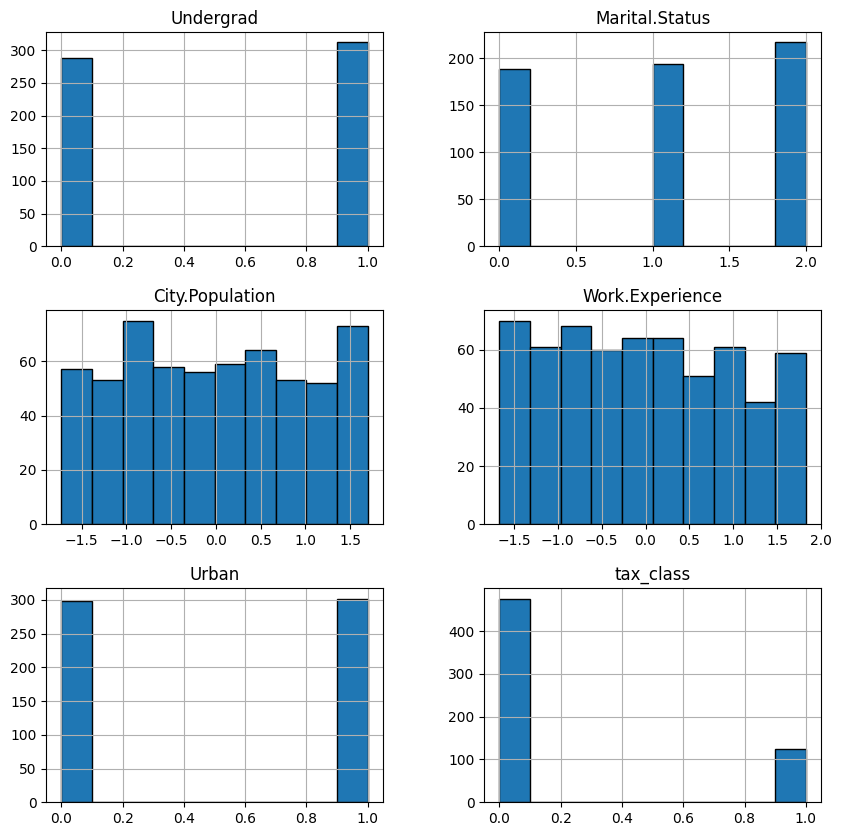

In [75]:
#visualization
df1.hist(edgecolor="black",linewidth=1, figsize=(10,10))

<Axes: >

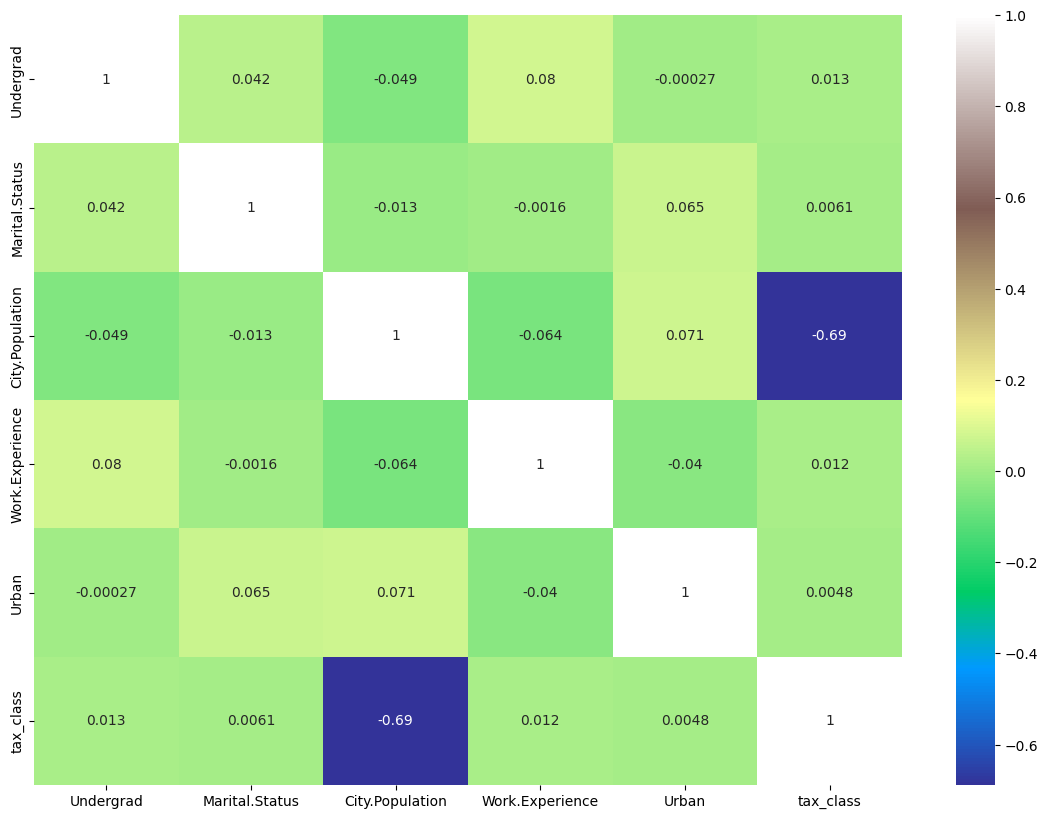

In [76]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(),annot=True,cmap="terrain")

In [77]:
x = df1.iloc[:,0:-1]
y = df1["tax_class"]
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

In [78]:
#Model building using Random FOrest classifier
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2, random_state=42)

In [79]:
r_model = RandomForestClassifier()
r_model.fit(x_train,y_train)
pred = r_model.predict(x_test)
print(np.mean(y_test==pred))

1.0


In [80]:
r_model=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
r_model.fit(x,y)
pred=r_model.predict(x)
print(np.mean(y==pred))

1.0


In [81]:
#kfold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(r_model,x, y, cv=kfold)
print(results.mean())

0.9983333333333334


In [82]:
#bagging
from sklearn.ensemble import BaggingClassifier

r_model=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
b_model=BaggingClassifier(base_estimator=r_model)
results=cross_val_score(b_model,x,y,cv=kfold)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.9983333333333334


In [83]:
#boosting
from sklearn.ensemble import AdaBoostClassifier
a_model=AdaBoostClassifier(base_estimator=r_model)
results=cross_val_score(a_model,x,y,cv=kfold)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.9983333333333334


In [84]:
#voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


In [85]:
estimators = []
model1 = LogisticRegression(max_iter = 500,solver = "liblinear")
estimators.append(("logistic",model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart",model2))
model3 = SVC()
estimators.append(("svm",model3))
model4 = AdaBoostClassifier(base_estimator=r_model)
estimators.append(("adaboost",model4))
model5=BaggingClassifier(base_estimator=r_model)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[1.         1.         1.         1.         0.98333333 1.
 1.         1.         1.         1.        ]


In [86]:
print(results.mean())

0.9983333333333334


In [87]:
#XGBM
from tqdm.notebook import tqdm, trange
import time
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [88]:
x_model = XGBClassifier()
x_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred = x_model.predict(x_test)
predictions = [round(value) for value in y_pred]

y_pred1 = x_model.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [90]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [91]:
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [94]:
#LGBM
import lightgbm as lgb
l_train = lgb.Dataset(x_train, label=y_train)


In [99]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [100]:
clf = lgb.train(params,l_train,100)

[LightGBM] [Info] Number of positive: 98, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204167 -> initscore=-1.360453
[LightGBM] [Info] Start training from score -1.360453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g